# Definiton of all measurements

## Denition of KeyPoints

In [1]:
# 'nose',                                   pos 0
#'left_eye', 'right_eye',                   pos 1 / 2
# 'left_ear', 'right_ear',                  pos 3 / 4
# 'left_shoulder', 'right_shoulder',        pos 5 / 6
# 'left_elbow', 'right_elbow',              pos 7 / 8
# 'left_wrist', 'right_wrist',              pos 9 / 10
# 'left_hip', 'right_hip',                  pos 11 / 12
# 'left_knee', 'right_knee',                pos 13 / 14
# 'left_ankle', 'right_ankle',              pos 15 / 16

#Format of 17 keypoints matrix for 1 image: 
#17 / 3 [y,x,likelyhood] 


In [2]:
import numpy as np
import math

In [3]:
image_front_T_kp = [[0.17349216, 0.56427723, 0.5236098 ],
        [0.16178887, 0.57046986, 0.52236605],
        [0.16322146, 0.55656576, 0.6874031 ],
        [0.17638007, 0.5828533 , 0.72497916],
        [0.17946883, 0.55041116, 0.76183915],
        [0.24724907, 0.60664934, 0.6900308 ],
        [0.2661889 , 0.5356395 , 0.7871611 ],
        [0.3592037 , 0.61628497, 0.5966688 ],
        [0.3696247 , 0.549422  , 0.5074349 ],
        [0.4646902 , 0.6258748 , 0.59548384],
        [0.29332668, 0.5630101 , 0.47110534],
        [0.42144495, 0.6031153 , 0.84182334],
        [0.42856565, 0.559704  , 0.79291236],
        [0.5857684 , 0.6084723 , 0.7321706 ],
        [0.5991622 , 0.5660539 , 0.78673285],
        [0.72647244, 0.61776626, 0.7692236 ],
        [0.7399327 , 0.59163785, 0.62649405]]
image_front_T_kp = np.array(image_front_T_kp)

In [4]:
image_front_I_kp = [[0.13626342, 0.57170576, 0.5406235 ],
       [0.12581952, 0.58031356, 0.5950187 ],
       [0.12306002, 0.5641533 , 0.5945765 ],
       [0.1330445 , 0.58676374, 0.46940276],
       [0.1319304 , 0.55489534, 0.48606545],
       [0.19684711, 0.6048043 , 0.37372732],
       [0.19630507, 0.53479004, 0.30953246],
       [0.26008302, 0.6065161 , 0.42267993],
       [0.25835255, 0.51460385, 0.49753478],
       [0.23563783, 0.59914243, 0.28201967],
       [0.25673127, 0.49728453, 0.4280582 ],
       [0.3964715 , 0.5841227 , 0.5168887 ],
       [0.3921252 , 0.54193866, 0.47156578],
       [0.5595846 , 0.58796036, 0.54856455],
       [0.5583141 , 0.54261553, 0.52169836],
       [0.7302867 , 0.5933529 , 0.4042293 ],
       [0.7241063 , 0.5598221 , 0.30607915]]
image_front_I_kp = np.array(image_front_I_kp)

In [5]:
image_profile_kp = [[0.17119896, 0.55431795, 0.65762174],
       [0.1641411 , 0.5632325 , 0.5738114 ],
       [0.16227084, 0.5482719 , 0.6999848 ],
       [0.17950638, 0.574966  , 0.570612  ],
       [0.17202213, 0.54290915, 0.57458735],
       [0.23494339, 0.56739473, 0.415179  ],
       [0.24977106, 0.55462873, 0.45368198],
       [0.3402242 , 0.5621322 , 0.44017628],
       [0.3311993 , 0.5404615 , 0.28933096],
       [0.4339265 , 0.5579535 , 0.62782705],
       [0.29925185, 0.50375867, 0.4816786 ],
       [0.43029714, 0.57282275, 0.57726043],
       [0.43196964, 0.5522737 , 0.5526497 ],
       [0.60913986, 0.55608445, 0.68798673],
       [0.60523015, 0.5404867 , 0.48570338],
       [0.75797564, 0.5934522 , 0.49470276],
       [0.7497481 , 0.56782985, 0.51544404]]
image_profile_kp = np.array(image_profile_kp)

In [6]:
#ADDITIONAL KEYPOINTS on picture FRONT_T / FRONT I

#left biceps, right biceps                      pos 17 / 18

def additional_kp_front(image_front_T_kp, image_front_I_kp):
    #Biceps - Image front T
    #left biceps pos 17
    l_x11 = image_front_T_kp[5][1] +abs(image_front_T_kp[7][1] - image_front_T_kp[5][1])/2
    l_y11 = (image_front_T_kp[7][0] + image_front_T_kp[5][0])/2
    #right biceps pos 18
    r_x11 = image_front_T_kp[8][1] + abs(image_front_T_kp[8][1]-image_front_T_kp[6][1])/2
    r_y11 = (image_front_T_kp[8][0] + image_front_T_kp[6][0])/2
    
    #Biceps - Image front I
    #left biceps pos 17
    l_x12 = abs(image_front_T_kp[7][1] + image_front_T_kp[5][1])/2
    l_y12 = image_front_T_kp[5][0] + abs(image_front_T_kp[7][0] - image_front_T_kp[5][0])/2
    #right biceps pos 18
    r_x12 = abs(image_front_T_kp[8][1]+image_front_T_kp[6][1])/2
    r_y12 = image_front_T_kp[6][0] + (image_front_T_kp[8][0] + image_front_T_kp[6][0])/2
    

    #left chest, right chest                      pos 19 / 20
    #left chest pos 19 
    l_x2 = image_front_T_kp[6][1] + abs(image_front_T_kp[6][1] - image_front_T_kp[5][1]) * 1/4   #considering chest "x" located  at 1/4 vs soulders
    l_y2 = image_front_T_kp[5][0] + abs(image_front_T_kp[11][0] - image_front_T_kp[5][0]) * 1/3  #considering chest "y" located  at 1/3 vs shoulders/hips
    #right chest pos 20
    r_x2 = image_front_T_kp[6][1] + abs(image_front_T_kp[6][1] - image_front_T_kp[5][1]) * 3/4   #considering chest "x" located  at 3/4 vs soulders
    r_y2 = image_front_T_kp[6][0] + abs(image_front_T_kp[12][0] - image_front_T_kp[6][0]) * 1/3  #considering chest "y" located  at 1/3 vs shoulders/hips
    
    #left waist, right waist                       pos 21 / 22
    #left waist pos 21
    l_x3 = l_x2                                                                                   #considering chest "x" located  at 1/4 vs soulders
    l_y3 = image_front_T_kp[5][0] + abs(image_front_T_kp[11][0] - image_front_T_kp[5][0]) * 2/3  #considering chest "y" located  at 2/3 vs shoulders/hi
    #right waist pos 22
    r_x3 = r_x2                                                                                   #considering chest "x" located  at 3/4 vs soulders
    r_y3 = image_front_T_kp[6][0] + abs(image_front_T_kp[12][0] - image_front_T_kp[6][0]) * 2/3  #considering chest "y" located  at 2/3 vs shoulders/hips
    
    #append new keypoints into matrix_kp front T, front I
    new_matrix_kp_T = np.vstack((image_front_T_kp, np.array([l_y11, l_x11, 0]), np.array([r_y11, r_x11, 0]), \
                              np.array([l_y2, l_x2, 0]), np.array([r_y2, r_x2, 0]), \
                              np.array([l_y3, l_x3, 0]), np.array([r_y3, r_x3, 0])))
    
    new_matrix_kp_I = np.vstack((image_front_I_kp, np.array([l_y12, l_x12, 0]), np.array([r_y12, r_x12, 0]), \
                              np.array([l_y2, l_x2, 0]), np.array([r_y2, r_x2, 0]), \
                              np.array([l_y3, l_x3, 0]), np.array([r_y3, r_x3, 0])))

    
    return new_matrix_kp_T, new_matrix_kp_I


In [7]:
additional_kp_front(image_front_T_kp, image_front_I_kp)

(array([[0.17349216, 0.56427723, 0.5236098 ],
        [0.16178887, 0.57046986, 0.52236605],
        [0.16322146, 0.55656576, 0.6874031 ],
        [0.17638007, 0.5828533 , 0.72497916],
        [0.17946883, 0.55041116, 0.76183915],
        [0.24724907, 0.60664934, 0.6900308 ],
        [0.2661889 , 0.5356395 , 0.7871611 ],
        [0.3592037 , 0.61628497, 0.5966688 ],
        [0.3696247 , 0.549422  , 0.5074349 ],
        [0.4646902 , 0.6258748 , 0.59548384],
        [0.29332668, 0.5630101 , 0.47110534],
        [0.42144495, 0.6031153 , 0.84182334],
        [0.42856565, 0.559704  , 0.79291236],
        [0.5857684 , 0.6084723 , 0.7321706 ],
        [0.5991622 , 0.5660539 , 0.78673285],
        [0.72647244, 0.61776626, 0.7692236 ],
        [0.7399327 , 0.59163785, 0.62649405],
        [0.30322638, 0.61146716, 0.        ],
        [0.3179068 , 0.55631325, 0.        ],
        [0.30531436, 0.55339196, 0.        ],
        [0.32031448, 0.58889688, 0.        ],
        [0.36337966, 0.55339196, 0

In [8]:
#ADDITIONAL KEYPOINTS on picture PROFILE

#left biceps, right biceps                      pos 17 / 18

def additional_kp_profile(image_profile_kp):
    #left biceps pos 17
    l_x1 = (image_profile_kp[7][1] + image_profile_kp[5][1])/2                            #average on x
    l_y1 = image_front_T_kp[5][0] + (image_front_T_kp[7][0] - image_front_T_kp[5][0])/2   #considering biceps is at half shoulder/elbow
    #right biceps pos 18
    r_x1 = abs(image_front_T_kp[8][1] + image_front_T_kp[6][1])/2                         #average on x
    r_y1 = image_front_T_kp[6][0] + (image_front_T_kp[8][0] + image_front_T_kp[6][0])/2   #considering biceps is at half shoulder/elbow

    #left chest, right chest                      pos 19 / 20
    #left chest pos 19 
    l_x2 = l_x1
    l_y2 = image_front_T_kp[5][0] + abs(image_front_T_kp[11][0] - image_front_T_kp[5][0]) * 1/3  #considering chest "y" located  at 1/3 vs shoulders/hips
    #right chest pos 20
    r_x2 = r_x1 
    r_y2 = image_front_T_kp[6][0] + abs(image_front_T_kp[12][0] - image_front_T_kp[6][0]) * 1/3  #considering chest "y" located  at 1/3 vs shoulders/hips

    #left waist, right waist                       pos 21 / 22
    #left waist pos 21
    l_x3 = l_x1
    l_y3 = image_front_T_kp[5][0] + abs(image_front_T_kp[11][0] - image_front_T_kp[5][0]) * 2/3  #considering chest "y" located  at 2/3 vs shoulders/hi
    #right waist pos 22
    r_x3 = r_x1
    r_y3 = image_front_T_kp[6][0] + abs(image_front_T_kp[12][0] - image_front_T_kp[6][0]) * 2/3  #considering chest "y" located  at 2/3 vs shoulders/hips
    
    #append new keypoints into matrix_kp
    new_matrix_kp_profile = np.vstack((image_front_T_kp, np.array([l_y1, l_x1, 0]), np.array([r_y1, r_x1, 0]), \
                              np.array([l_y2, l_x2, 0]), np.array([r_y2, r_x2, 0]), \
                              np.array([l_y3, l_x3, 0]), np.array([r_y3, r_x3, 0])))

    
    return new_matrix_kp_profile


In [9]:
additional_kp_profile(image_profile_kp)

array([[0.17349216, 0.56427723, 0.5236098 ],
       [0.16178887, 0.57046986, 0.52236605],
       [0.16322146, 0.55656576, 0.6874031 ],
       [0.17638007, 0.5828533 , 0.72497916],
       [0.17946883, 0.55041116, 0.76183915],
       [0.24724907, 0.60664934, 0.6900308 ],
       [0.2661889 , 0.5356395 , 0.7871611 ],
       [0.3592037 , 0.61628497, 0.5966688 ],
       [0.3696247 , 0.549422  , 0.5074349 ],
       [0.4646902 , 0.6258748 , 0.59548384],
       [0.29332668, 0.5630101 , 0.47110534],
       [0.42144495, 0.6031153 , 0.84182334],
       [0.42856565, 0.559704  , 0.79291236],
       [0.5857684 , 0.6084723 , 0.7321706 ],
       [0.5991622 , 0.5660539 , 0.78673285],
       [0.72647244, 0.61776626, 0.7692236 ],
       [0.7399327 , 0.59163785, 0.62649405],
       [0.30322638, 0.56476346, 0.        ],
       [0.5840957 , 0.54253075, 0.        ],
       [0.30531436, 0.56476346, 0.        ],
       [0.32031448, 0.54253075, 0.        ],
       [0.36337966, 0.56476346, 0.        ],
       [0.

In [10]:
#Convert Matrix Keypoints coordinates in x,y to pixels(contouring matrix)
def convert_kp_matrix_front_T(matrix_kp_front_T, image_h, image_l):
    x = np.round(matrix_kp_front_T[: , 1] * image_l)
    x = [ int(i) for i in x]                                      #convert in int
    y = np.round(matrix_kp_front_T[: , 0] * image_h) 
    y = [ int(i) for i in y]                                      #convert in int
    matrix_kp_converted = list(zip(y,x))
    return matrix_kp_converted

def convert_kp_matrix_front_I(matrix_kp_front_I, image_h, image_l):
    x = np.round(matrix_kp_front_I[: , 1] * image_l)
    x = [ int(i) for i in x]   
    y = np.round(matrix_kp_front_I[: , 0] * image_h)
    y = [ int(i) for i in y]
    matrix_kp_converted = list(zip(y,x))
    return matrix_kp_converted

def convert_kp_matrix_profile(matrix_kp_profile, image_h, image_l):
    x = np.round(matrix_kp_profile[: , 1] * image_l)
    x = [ int(i) for i in x]  
    y = np.round(matrix_kp_profile[: , 0] * image_h)
    y = [ int(i) for i in y]
    matrix_kp_converted = list(zip(y,x))
    return matrix_kp_converted

# Define ratio between real measure(in mm) vs pixel position
# def ratio_real_vs_pixel(real_height, matrix_image_contouring, image_l):
#     list_sum_y=[]
#     #sum of all "1" for each x to get the sum max ie. height
#     for i in range(0,image_l):
#         list_sum_y.append(np.sum(matrix_image_contouring[: , i]))
#     print(max(list_sum_y))
#     ratio_mm_px = real_height / max(list_sum_y)                            #ratio real height (in mm) / max sum of "1"
#     return ratio_mm_px

## Measurements for T-shirt
https://freesewing.org/designs/teagan/

In [14]:
import matplotlib.pyplot as plt
import cv2
array = cv2.imread(r"pexels-photo-60219.png")

In [15]:
matrix_cont = array.mean(axis=-1)
matrix_cont.shape

(768, 1024)

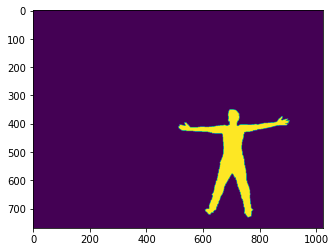

In [17]:
#defintion of matrix contouring
matrix_cont
plt.imshow(matrix_cont)

In [18]:
matrix_cont

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
#Matrix of kp coming from other notebook - considering image.shape of (1, 768, 1024, 3)
test_matrix_front_kp = np.array([[0.48695812, 0.68326586, 0.5639537 ],
          [0.4778103 , 0.68713045, 0.50732034],
          [0.47737232, 0.67476934, 0.5956619 ],
          [0.4883077 , 0.70074975, 0.57466257],
          [0.4893417 , 0.6668179 , 0.49692088],
          [0.52557784, 0.7172219 , 0.48050335],
          [0.539968  , 0.6626774 , 0.5938845 ],
          [0.52591187, 0.7609507 , 0.21174023],
          [0.54629296, 0.63570327, 0.28719622],
          [0.51536655, 0.852199  , 0.3918358 ],
          [0.51517344, 0.62228054, 0.13233644],
          [0.6867487 , 0.70954204, 0.4412909 ],
          [0.68755573, 0.6688813 , 0.366415  ],
          [0.8038848 , 0.72793126, 0.46259767],
          [0.7948738 , 0.6616839 , 0.4294906 ],
          [0.9306485 , 0.737101  , 0.3557214 ],
          [0.9053455 , 0.621957  , 0.37097037]])
test_matrix_front_kp.shape

(17, 3)

In [20]:
#estimation of this value
ratio_mm_px = 1800/350
ratio_mm_px


5.142857142857143

In [21]:
additional_kp_front(test_matrix_front_kp,test_matrix_front_kp )
test_matrix_front_kp = additional_kp_front(test_matrix_front_kp,test_matrix_front_kp )[0]
test_matrix_front_kp_1 =  additional_kp_front(test_matrix_front_kp,test_matrix_front_kp )[1]

In [23]:
test_matrix_front_kp_conv = convert_kp_matrix_front_T(test_matrix_front_kp, 768, 1024)
test_matrix_front_kp_1_conv = convert_kp_matrix_front_I(test_matrix_front_kp, 768, 1024)
test_matrix_front_kp_conv , test_matrix_front_kp_1_conv 

([(374, 700),
  (367, 704),
  (367, 691),
  (375, 718),
  (376, 683),
  (404, 734),
  (415, 679),
  (404, 779),
  (420, 651),
  (396, 873),
  (396, 637),
  (527, 727),
  (528, 685),
  (617, 745),
  (610, 678),
  (715, 755),
  (695, 637),
  (404, 757),
  (417, 665),
  (445, 693),
  (452, 720),
  (486, 693),
  (490, 720)],
 [(374, 700),
  (367, 704),
  (367, 691),
  (375, 718),
  (376, 683),
  (404, 734),
  (415, 679),
  (404, 779),
  (420, 651),
  (396, 873),
  (396, 637),
  (527, 727),
  (528, 685),
  (617, 745),
  (610, 678),
  (715, 755),
  (695, 637),
  (404, 757),
  (417, 665),
  (445, 693),
  (452, 720),
  (486, 693),
  (490, 720)])

In [26]:
#Front picture in T shape
def biceps_circumference(matrix_kp_front_converted, matrix_image_front_cont):
    #left biceps
    x1 = matrix_kp_front_converted[17][1]
    sum_left = np.sum(matrix_image_front_cont[:, x1])
    
    #right biceps
    x2 = matrix_kp_front_converted[18][1]
    sum_right = np.sum(matrix_image_front_cont[:, x2])
    
    #diameter left / right biceps "height"
    average_mm = ((sum_left + sum_right) / 2) * ratio_mm_px
    
    #biceps circumference in mm
    circumference_biceps = (average_mm) * math.pi
    print(x1,x2)
    print(sum_left, sum_right)
    print(average_mm)
    return  circumference_biceps

In [28]:
biceps_circumference(test_matrix_front_kp_conv, matrix_cont)

757 665
146.0 158.0
781.7142857142858


2455.8278572061927

In [29]:
#Front picture in T shape + profile picture
def chest_circumference(matrix_kp_front_converted, matrix_image_front_cont, matrix_kp_profile_converted, matrix_image_profile_cont, ):
    #measure width (along axis x) for given y, on front picture
    y_front1 = matrix_kp_front_converted[19][0]
    y_front2 = matrix_kp_front_converted[20][0]
    y_average = int((y_front1+y_front2)/2)
    sum_x_front = np.sum(matrix_image_front_cont[y_average,:])
    
    #measure width (along axis x) for given y, on profile picture
    y_prof1 = matrix_kp_front_converted[19][0]
    y_prof2 = matrix_kp_front_converted[20][0]
    y_average = int((y_prof1 + y_prof2)/2)
    sum_x_prof = np.sum(matrix_image_front_cont[y_average,:])
    
    #chest circumference in mm
    circumference_chest = (sum_x_front + sum_x_prof) * 2 * ratio_mm_px
    
    print(y_front1, y_front2)
    print(matrix_image_front_cont[y_average,:])
    print(sum_x_front, sum_x_prof)
    
    return circumference_chest

In [30]:
chest_circumference(test_matrix_front_kp_conv, matrix_cont, test_matrix_front_kp_conv, matrix_cont)

445 452
[0. 0. 0. ... 0. 0. 0.]
73.0 73.0


1501.7142857142858

In [33]:
#Current solution is distance between shoulder (# 5 / 6) and waist (# 21 / 22) with a factor 1.2
def hps_to_waist_back(matrix_kp_front_converted, matrix_image_front_cont):
    a = (abs(matrix_kp_front_converted[5][0] - matrix_kp_front_converted[21][0]) + abs(matrix_kp_front_converted[6][0] - matrix_kp_front_converted[22][0])) /2
    #convert in mm and apply factor of 1.2
    distance = a * 1.2 * ratio_mm_px
    
    return distance
    

In [34]:
hps_to_waist_back(test_matrix_front_kp_conv, matrix_cont)

484.4571428571429

In [38]:
#Front picture in T shape + Profile picture
def hips_circumference(matrix_kp_front_converted, matrix_image_front_cont, matrix_kp_profile_converted, matrix_image_profile_cont):
    
    #measure width (along axis x) for given y, on front picture
    y_front1 = matrix_kp_front_converted[11][1]
    y_front2 = matrix_kp_front_converted[12][1]
    y_average = int((y_front1+y_front2)/2)
    sum_x_front = np.sum(matrix_image_front_cont[y_average,:])
    
    #measure width (along axis x) for given y, on profile picture
    y_prof1 = matrix_kp_front_converted[11][1]
    y_prof2 = matrix_kp_front_converted[12][1]
    y_average = int((y_prof1 + y_prof2)/2)
    sum_x_prof = np.sum(matrix_image_front_cont[y_average,:])
    
    #hips circumference in mm
    hips_circ = (sum_x_front + sum_x_prof) * 2 * ratio_mm_px
    
    return hips_circ

In [39]:
hips_circumference(test_matrix_front_kp_conv, matrix_cont, test_matrix_front_kp_conv, matrix_cont)

1254.857142857143

In [70]:
#Profile picture
def neck_circumference( matrix_kp_profile_converted, matrix_image_profile_cont):
    #Estimated neck position on y located at 1/3 above shoulders vs ears
    neck_y = int(matrix_kp_profile_converted[5][0]
                 - abs(matrix_kp_profile_converted[5][0] - matrix_kp_profile_converted[3][0]) *(1/4))
    #sum over x considering neck_y = a
    sum_x = np.sum(matrix_image_profile_cont[neck_y,:])
    
    #neck circumference in mm
    neck_circ = (sum_x * ratio_mm_px) * math.pi
    
    print(neck_y)
    print(sum_x)
    
    return neck_circ
    

In [71]:
neck_circumference(test_matrix_front_kp_conv, matrix_cont)

396
95.0


1534.8924107538705

In [76]:
#Front picture in T shape
#Consider distance (on x) between shoulder kp and ear kp, plus half width of biceps
def shoulder_slope(matrix_kp_front_converted, matrix_image_front_cont):
    #left biceps
    x1 = matrix_kp_front_converted[17][1]
    sum_left = np.sum(matrix_image_front_cont[:, x1])
    
    #distance (on x) between kp for shoulder / ear
    distance = (abs(matrix_kp_front_converted[5][1] - matrix_kp_front_converted[3][1]) + abs(matrix_kp_front_converted[4][1] - matrix_kp_front_converted[6][1])) / 2
    
    #overall distance in mm 
    total_distance = distance + sum_left/2 * ratio_mm_px
    
    return total_distance


In [77]:
shoulder_slope(test_matrix_front_kp_conv, matrix_cont)

385.42857142857144

In [82]:
#Front picture in I shape
def shoulder_to_shoulder( matrix_kp_front_converted, matrix_image_front_cont ):
    #average y for shoulders kp
    y1 =int(( matrix_kp_front_converted[5][1] + matrix_kp_front_converted[6][1] ) / 2)
    #distance (on x) between shoulders 
    sum_shoulders = np.sum(matrix_image_front_cont[y1, :])
    #convert distance in mm
    distance = sum_shoulders * ratio_mm_px
    
    return distance 
    

In [83]:
shoulder_to_shoulder(test_matrix_front_kp_conv, matrix_cont)

313.7142857142857

In [88]:
#Front picture in T shape + Profile picture
def waist_circumference(matrix_kp_front_converted, matrix_image_front_cont, matrix_kp_profile_converted, matrix_image_profile_cont):
    
    #measure width (along axis x) for given y, on front picture
    y_front1 = matrix_kp_front_converted[21][0]
    y_front2 = matrix_kp_front_converted[22][0]
    y_average = int((y_front1+y_front2)/2)
    sum_x_front = np.sum(matrix_image_front_cont[y_average,:])
    
    #measure width (along axis x) for given y, on profile picture
    y_prof1 = matrix_kp_profile_converted[11][0]
    y_prof2 = matrix_kp_profile_converted[12][0]
    y_average = int((y_prof1 + y_prof2)/2)
    sum_x_prof = np.sum(matrix_image_front_cont[y_average,:])
    
    #waist circumference in mm
    waist_circumference = (sum_x_front + sum_x_prof) * 2 * ratio_mm_px
    
    return waist_circumference


In [89]:
waist_circumference(test_matrix_front_kp_conv, matrix_cont, test_matrix_front_kp_conv, matrix_cont)

1491.4285714285716

In [90]:
#Front picture in T shape
def waist_to_hips(matrix_kp_front_converted, matrix_image_front_cont):
    #average distance (on y) between waist(21,22) and hips(11,12) with correction factor of 1.2
    a = (abs(matrix_kp_front_converted[22][1] - matrix_kp_front_converted[12][1])
         +abs(matrix_kp_front_converted[21][1] - matrix_kp_front_converted[11][1])) / 2
    #convert in mm and apply factor of 1.2
    distance = a * 1.2 * ratio_mm_px
    
    return distance


In [91]:
waist_to_hips(test_matrix_front_kp_conv, matrix_cont)

212.9142857142857

## Draft Code


In [166]:
m = np.array([(1.5,2,3), (4,5,6), (10,-8,-4), (12,-4,-1)])
m

array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ],
       [10. , -8. , -4. ],
       [12. , -4. , -1. ]])

In [164]:
np.sum(m[1,:])

15.0

In [51]:
y_average

0
[ 1.5  4.  10.  12. ]
27.5
1
[ 2.  5. -8. -4.]
-5.0
2
[ 3.  6. -4. -1.]
4.0


120.0

In [70]:
np.round(np.array(m[1]))

array([4., 5., 6.])

In [ ]:
m.shape[0]

In [ ]:
bb = range(0,11)
bb

In [ ]:
for i in bb:
    print(i)